In [1]:
%load_ext autoreload
%autoreload 2
%run A_simple_net.ipynb

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/__init__.py:53: UserWarning:Unable to install NEST extensions. Certain models may not be available.


Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.18.1

numpy     : 1.19.2
matplotlib: 3.3.2
pyNN      : 0.9.5
neo       : 0.8.0
nixio     : 1.5.0b6
pandas    : 0.25.3

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: inv-ope-de06

Git hash: 4fac18a1d455447eeb6ca4def3d45b208ad93dc5

Git repo: https://github.com/SpikeAI/2020-11_brainhack_Project7

Git branch: main



# scanning over single parameters

## initializing parameters

In [2]:
tag = '2020-12-04_scan_' + simulator

In [3]:
buildCPUTime, simCPUTime, writeCPUTime = run(verbose=True)

/usr/lib/python3.8/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.
2020-12-04 13:09:44,368 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:44,370 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


0 Creating cell populations...
0 Initialising membrane potential to random values...
0 Connecting populations...
0 Setting up recording...0%                                                                                                                                                                                                                                                                                                                                                                                                                                      
0 Running simulation...
0 Writing data to file...

--- Vogels-Abbott Network Simulation ---
Nodes                  : 1
Number of Neurons      : 1000
Excitatory conductance : 4 nS
Inhibitory conductance : 51 nS
Excitatory rate        : 0.715 Hz
Inhibitory rate        : 0.73 Hz
Build time             : 2965.25 ms
Simulation time        : 2405.91 ms
Writing time           : 183.13 ms


In [4]:
%mkdir -p outputs

## Running Model and Loading Results

In [5]:
import os
import pandas as pd
verbose = True
def scan(variable, values, tag=tag, verbose=verbose):
    filename = f'outputs/{tag}_{variable}.json'
    try:
        df = pd.read_json(filename)
        print('Loaded file')
    except:
        df = pd.DataFrame([], columns=[variable, 'buildCPUTime', 'simCPUTime', 'writeCPUTime'])
        for i, value in enumerate(values):
            if verbose: print(f'{variable=}---{value=}')
            args = {}
            args[variable] = value
            buildCPUTime, simCPUTime, writeCPUTime = run(**args)
            df.loc[i]= {variable: value, 'buildCPUTime':buildCPUTime, 'simCPUTime':simCPUTime, 'writeCPUTime':writeCPUTime}
        df.to_json(filename)
    return df

In [6]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression
def plot(df, do_intercept=False):
    variable = df.columns[0]
    fig, ax = plt.subplots(figsize=(8,8))
    
    for regressor, color in zip(['buildCPUTime', 'simCPUTime', 'writeCPUTime'],
                                ['r', 'g', 'b']):

        import patsy
        if do_intercept:
            y, X = patsy.dmatrices(f'{regressor} ~ {variable}', data=df, return_type='dataframe')
        else:
            y, X = patsy.dmatrices(f'{regressor} ~ 0 + {variable}', data=df, return_type='dataframe')

        import statsmodels.api as sm
        fit = sm.OLS(y, X).fit()
        print(fit.summary())

        if do_intercept: intercept = fit.params.Intercept
        slope = fit.params[variable]

        values = np.array(df[variable])
        if do_intercept:
            ax.plot(values, intercept + slope*values, c=color, lw=2, label=f"{regressor}={slope:.3f}*{variable} + {intercept:.3f}")
        else:
            ax.plot(values, slope*values, c=color, lw=2, label=f"{regressor}={slope:.3f}*{variable}")
        df.plot(x=variable, y=regressor, c=color, lw=1, ls='-.', ax=ax, legend=False)

    ax.set_xlim(0)
    ax.set_ylabel('Time (ms)')
    ax.set_ylim(0)
    ax.legend()
    return fig, ax

## plot as a function of neuron numbers

In [7]:
import numpy as np
N_pops = np.array([int(k)**2 for k in np.linspace(8**2, 45**2, 14, endpoint=True)**.5])
N_pops

array([  64,  196,  361,  484,  625,  784,  961, 1089, 1225, 1369, 1521,
       1681, 1849, 2025])

In [8]:
results_pop = scan('N_pop', N_pops)

2020-12-04 13:09:50,342 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:50,343 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=64


2020-12-04 13:09:50,657 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:50,658 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=196


2020-12-04 13:09:51,325 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:51,327 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=361


2020-12-04 13:09:52,508 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:52,510 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=484


2020-12-04 13:09:53,961 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:53,963 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=625


2020-12-04 13:09:55,841 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:55,843 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=784


2020-12-04 13:09:58,291 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:09:58,293 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=961


2020-12-04 13:10:01,257 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:01,259 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1089


2020-12-04 13:10:04,671 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:04,673 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1225


2020-12-04 13:10:08,489 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:08,492 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1369


2020-12-04 13:10:12,910 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:12,913 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1521


/home/laurent/.local/lib/python3.8/site-packages/pyNN/recording/__init__.py:264: UserWarning:Recorded at least one spike after t_stop
2020-12-04 13:10:17,966 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:17,970 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1681


2020-12-04 13:10:23,713 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:23,716 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=1849


2020-12-04 13:10:30,058 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:30,061 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='N_pop'---value=2025


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=14
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=14
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=14


                                 OLS Regression Results                                
Dep. Variable:           buildCPUTime   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              5666.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                    1.50e-18
Time:                        13:10:37   Log-Likelihood:                         -66.297
No. Observations:                  14   AIC:                                      134.6
Df Residuals:                      13   BIC:                                      135.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

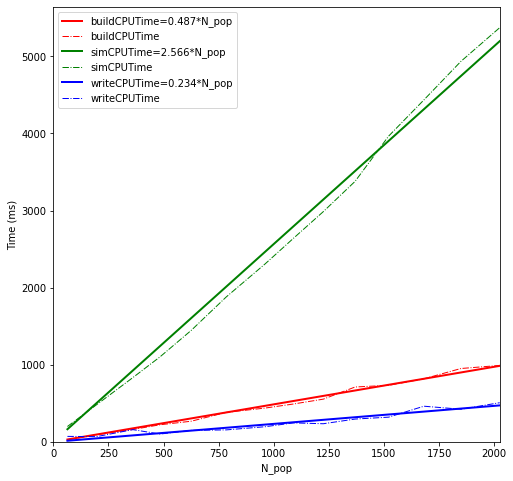

In [9]:
fig, ax = plot(results_pop)

In [10]:
fig.savefig(tag + '_N_pop.png')

## plot as a function of simtime

In [11]:
simtimes = np.linspace(500, 3000, 15, endpoint=True)
simtimes

array([ 500.        ,  678.57142857,  857.14285714, 1035.71428571,
       1214.28571429, 1392.85714286, 1571.42857143, 1750.        ,
       1928.57142857, 2107.14285714, 2285.71428571, 2464.28571429,
       2642.85714286, 2821.42857143, 3000.        ])

In [12]:
results_simtime = scan('simtime', simtimes)

2020-12-04 13:10:37,588 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:37,591 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=500.0


2020-12-04 13:10:39,608 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:39,610 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=678.5714285714286


2020-12-04 13:10:42,061 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:42,064 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=857.1428571428571


2020-12-04 13:10:45,046 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:45,049 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1035.7142857142858


2020-12-04 13:10:48,502 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:48,504 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1214.2857142857142


2020-12-04 13:10:52,341 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:52,343 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1392.857142857143


2020-12-04 13:10:56,638 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:10:56,640 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1571.4285714285716


2020-12-04 13:11:01,517 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:01,520 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1750.0


2020-12-04 13:11:06,740 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:06,742 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=1928.5714285714287


2020-12-04 13:11:12,403 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:12,406 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=2107.1428571428573


2020-12-04 13:11:18,599 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:18,601 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=2285.714285714286


2020-12-04 13:11:25,119 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:25,121 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=2464.2857142857147


2020-12-04 13:11:32,081 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:32,083 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=2642.857142857143


2020-12-04 13:11:39,522 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:39,524 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=2821.4285714285716


2020-12-04 13:11:47,499 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:47,501 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=3000.0


                            OLS Regression Results                            
Dep. Variable:           buildCPUTime   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.140
Date:                Fri, 04 Dec 2020   Prob (F-statistic):              0.305
Time:                        13:11:55   Log-Likelihood:                -62.102
No. Observations:                  15   AIC:                             128.2
Df Residuals:                      13   BIC:                             129.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    493.2684     10.450     47.204      0.0

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=15
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=15
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1449: UserWarning:kurtosistest only valid for n>=20 ... continuing anyway, n=15


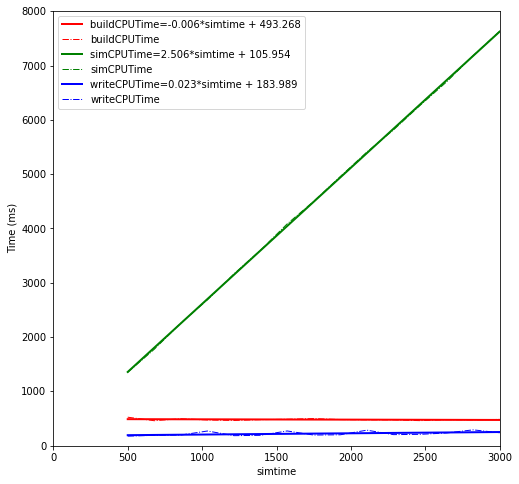

In [13]:
fig, ax = plot(results_simtime, do_intercept=True)      

In [14]:
fig.savefig(tag + '_simtime.png')

# scanning over two parameters

## Setting-up model and initializing parameters

In [15]:
tag = '2020-12-04_scan-2D_' + simulator

## Running Model and Loading Results

In [16]:
variables = ['N_pop', 'simtime']
filename = f'outputs/{tag}'
for variable in variables: filename +=  '_' + variable
filename += '.json'

In [17]:
import os
import time
import pandas as pd
verbose = True
def scan(variables, values, tag=tag, verbose=verbose):
    filename = f'outputs/{tag}'
    for variable in variables: filename +=  '_' + variable
    filename += '.json'
    try:
        df = pd.read_json(filename)
        print('Loaded file')
    except:
        
        df = pd.DataFrame([], columns=[variable, 'buildCPUTime', 'simCPUTime', 'writeCPUTime'])
        for i, value in enumerate(values):
            if verbose: print(f'{variable=}---{value=}')
            args = {}
            for variable, v in zip(variables, value):
                args[variable] = v
            buildCPUTime, simCPUTime, writeCPUTime = run(**args)
            df.loc[i]= dict(zip(variables + ['buildCPUTime', 'simCPUTime', 'writeCPUTime'], 
                                list(values) + [buildCPUTime, simCPUTime, writeCPUTime]))

        df.to_json(filename)
        
    return df

## Running time as a function of neuron numbers and simtime

In [18]:
import numpy as np

In [19]:
N_trials = 200
N_pops = [int(k)**2 for k in np.linspace(15, 60, N_trials, endpoint=True)]
simtimes = np.linspace(200, 3000, N_trials, endpoint=True)

In [20]:
np.random.seed(42)
np.random.shuffle(N_pops)
np.random.shuffle(simtimes)
values = zip(N_pops, simtimes)

In [ ]:
results = scan(variables=variables, values=values)
results

2020-12-04 13:11:56,394 WARNING  [PyNN] NEST does not allow setting an initial value for g_ex (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)
2020-12-04 13:11:56,397 WARNING  [PyNN] NEST does not allow setting an initial value for g_in (/home/laurent/.local/lib/python3.8/site-packages/pyNN/nest/populations.py[174]:_set_initial_value_array)


variable='simtime'---value=(1296, 2676.381909547739)


## analysis

In [ ]:
results_ext = results.copy()
results_ext['simtime_N_pop'] = results_ext['simtime'] * results_ext['N_pop']
results_ext

In [ ]:
variables_ext = ['N_pop', 'simtime_N_pop']
X = results_ext[variables_ext].values.reshape(-1, len(variables_ext))


https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

See https://patsy.readthedocs.io/en/latest/quickstart.html

In [ ]:
import patsy
import statsmodels.api as sm

for regressor in ['buildCPUTime', 'simCPUTime', 'writeCPUTime']:
    y = results_ext[regressor].values
    print(variables_ext, X.shape, y.shape)
    y, X = patsy.dmatrices(f'{regressor} ~ 0 + N_pop + simtime_N_pop', data=results_ext, return_type='dataframe')

    fit = sm.OLS(y, X).fit()
    fit.summary()

    print(f'{regressor} (ms) = {fit.params[0]:.3f} * N_pop + {fit.params[1]*1000:.3f}/1000 * simtime (ms) * N_pop')